In [1]:
from scipy.ndimage import correlate
import numpy as np
from skimage import color, io, measure, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

In [2]:
# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

In [3]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "lego_5.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [4]:
#Grayscale
im_org = color.rgb2gray(im_org)
#Otsu threshold
thres = threshold_otsu(im_org)
print(thres)
#Binary image
bin_img = im_org < thres

0.7103125574448529


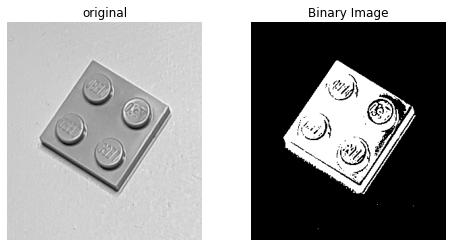

In [5]:
plot_comparison(im_org, bin_img, 'Binary Image')

In [6]:
footprint = disk(2)
# Check the size and shape of the structuring element
print(footprint)

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


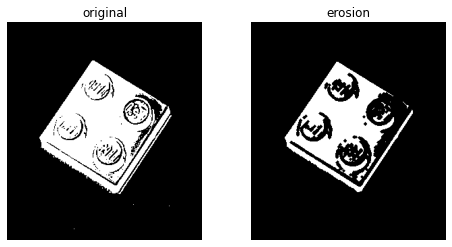

In [7]:
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

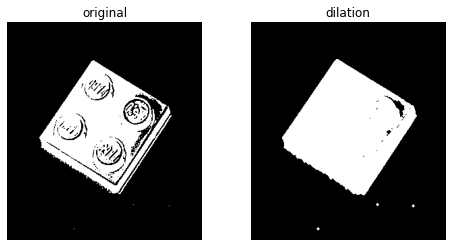

In [8]:
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img, dilated, 'dilation')

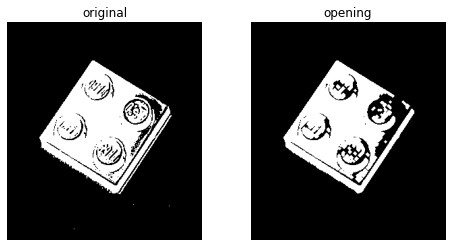

In [9]:
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

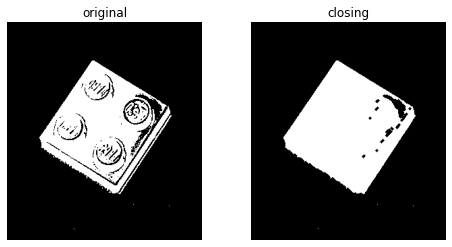

In [10]:
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

In [11]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

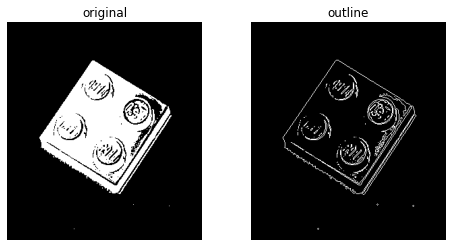

In [12]:
plot_comparison(bin_img, compute_outline(bin_img), 'outline')

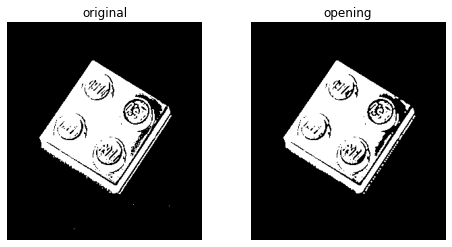

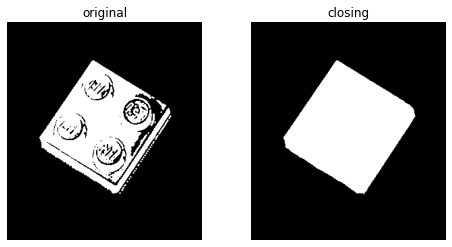

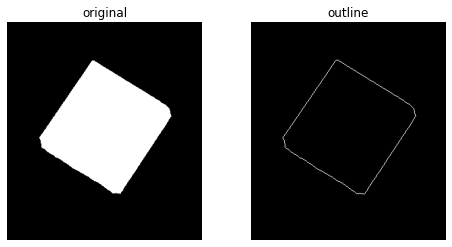

In [13]:
footprint_open = disk(1)
footprint_close = disk(15)
opened = opening(bin_img, footprint_open)
closed = closing(opened, footprint_close)
outline = compute_outline(closed)
plot_comparison(bin_img, opened, 'opening')
plot_comparison(opened, closed, 'closing')
plot_comparison(closed, outline, 'outline')

In [14]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "lego_7.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [15]:
#Grayscale
im_org = color.rgb2gray(im_org)
#Otsu threshold
thres = threshold_otsu(im_org)
print(thres)
#Binary image
bin_img = im_org < thres

0.5710768405330883


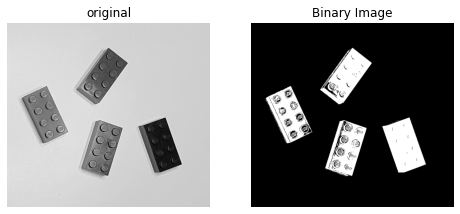

In [16]:
plot_comparison(im_org, bin_img, 'Binary Image')

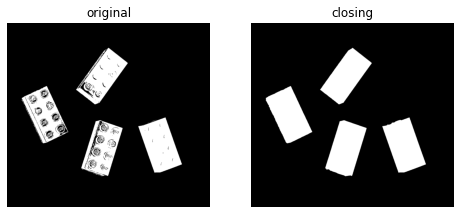

(17, 17)


In [17]:
footprint = disk(8) #8 is desired
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')
print(footprint.shape)

In [18]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "lego_3.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [19]:
#Grayscale
im_org = color.rgb2gray(im_org)
#Otsu threshold
thres = threshold_otsu(im_org)
print(thres)
#Binary image
bin_img = im_org < thres

0.5860621698835784


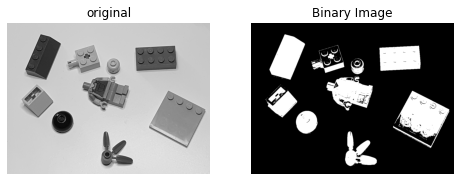

In [20]:
plot_comparison(im_org, bin_img, 'Binary Image')

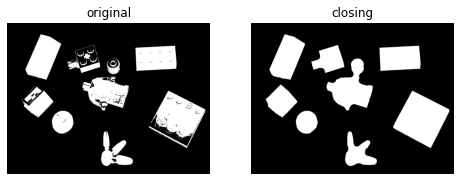

(37, 37)


In [21]:
footprint = disk(18) #18 is desired
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')
print(footprint.shape)

In [22]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "lego_9.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [23]:
#Grayscale
im_org = color.rgb2gray(im_org)
#Otsu threshold
thres = threshold_otsu(im_org)
print(thres)
#Binary image
bin_img = im_org < thres
#Outline
outline = compute_outline(bin_img)

0.5345207352941177


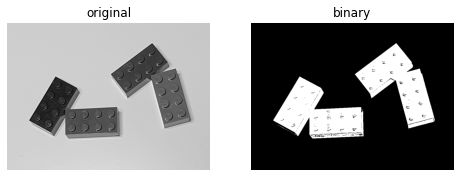

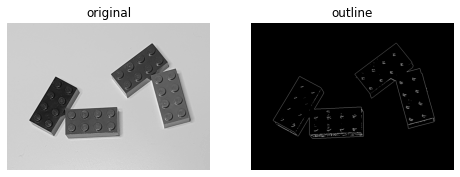

In [24]:
plot_comparison(im_org, bin_img, 'binary')
plot_comparison(im_org, outline, 'outline')

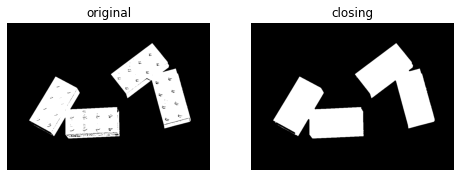

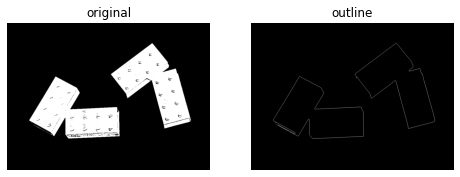

In [25]:
footprint = disk(3) #3 is desired
closed = closing(bin_img, footprint)
outline_new = compute_outline(closed)
plot_comparison(bin_img, closed, 'closing')
plot_comparison(bin_img, outline_new, 'outline')

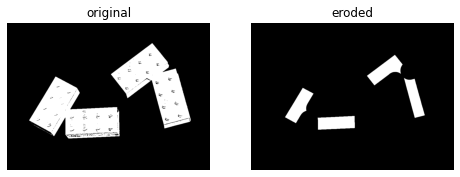

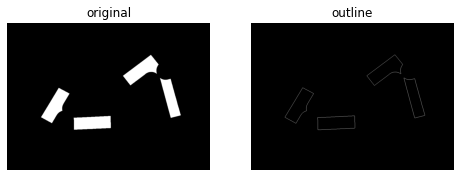

In [26]:
footprint_erosion = disk(40) #40 separates them
eroded = erosion(closed, footprint_erosion)
outline_newest = compute_outline(eroded)
plot_comparison(bin_img, eroded, 'eroded')
plot_comparison(eroded, outline_newest, 'outline')

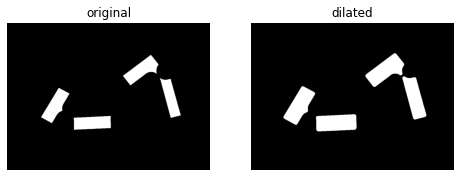

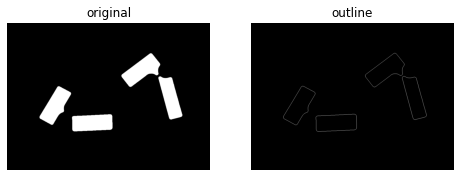

In [27]:
footprint_dilation = disk(8) #8 makes them as large as possible without touching
dilated = dilation(eroded, footprint_dilation)
outline_newestest = compute_outline(dilated)
plot_comparison(eroded, dilated, 'dilated')
plot_comparison(dilated, outline_newestest, 'outline')

In [28]:
# Directory containing data and images
in_dir = "data 2/"
# X-ray image
im_name = "puzzle_pieces.png"
# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org1 = io.imread(in_dir + im_name)

In [29]:
#Grayscale
im_org1 = color.rgb2gray(im_org1)
#Otsu threshold
thres1 = threshold_otsu(im_org1)
print(thres)
#Binary image
bin_img1 = im_org1 < thres1
#Outline
outline1 = compute_outline(bin_img1)

0.5345207352941177


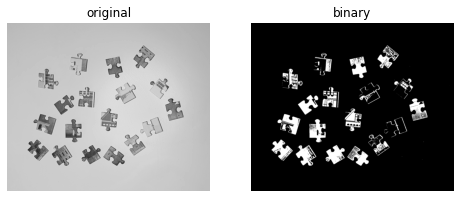

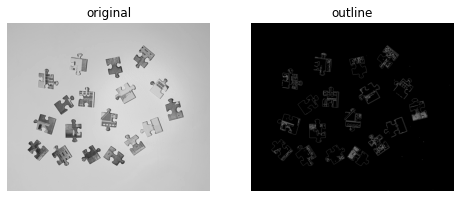

In [30]:
plot_comparison(im_org1, bin_img1, 'binary')
plot_comparison(im_org1, outline1, 'outline')

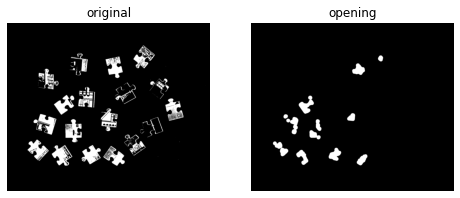

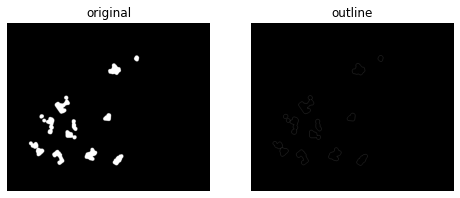

In [35]:
footprint_opening1 = disk(20) #
opening1 = opening(bin_img1, footprint_opening1)
outline_puzzle1 = compute_outline(opening1)
plot_comparison(bin_img1, opening1, 'opening')
plot_comparison(opening1, outline_puzzle1, 'outline')